In [1]:
from __future__ import division, print_function

import netCDF4 as nc
import numpy as np
import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
%matplotlib inline

In [2]:
grid = nc.Dataset('/mnt/storage0/jacquielee/data/hsquare.nc')

In [3]:
grid.variables

OrderedDict([(u'nav_lon', <type 'netCDF4._netCDF4.Variable'>
              float32 nav_lon(x, y)
              unlimited dimensions: 
              current shape = (800, 544)
              filling off), (u'nav_lat', <type 'netCDF4._netCDF4.Variable'>
              float32 nav_lat(x, y)
              unlimited dimensions: 
              current shape = (800, 544)
              filling off), (u'hsquare', <type 'netCDF4._netCDF4.Variable'>
              float32 hsquare(x, y)
              unlimited dimensions: 
              current shape = (800, 544)
              filling off)])

In [4]:
navLon=grid.variables['nav_lon'][:,:]
navLat=grid.variables['nav_lat'][:,:]
E = grid.variables['hsquare'][:,:]

In [24]:
E = ma.masked_where(E[:,:]==-1.0,E)

In [43]:
E.max()

183782.97

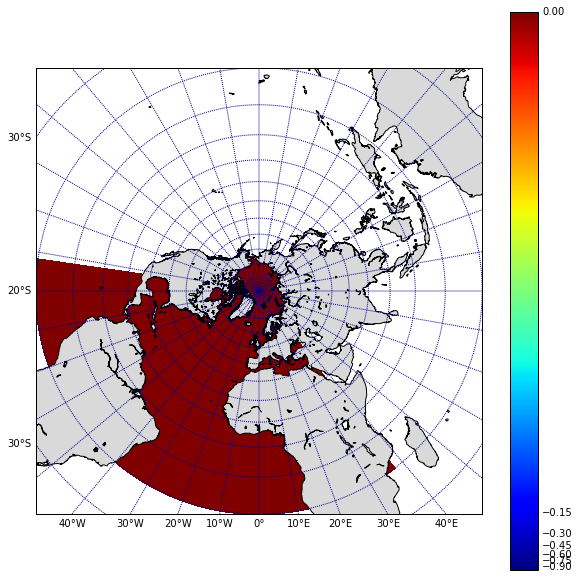

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

m = Basemap(projection='npstere',boundinglat=-20,lon_0=0,resolution='l',round=False, ax=axes)
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=90)
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=90)
#x_lon, y_lat = m(x[:,],y[:,])
#x_lon, y_lat = np.meshgrid(navLon, navLat)
X,Y = m(navLon, navLat)
m = m.pcolor(X,Y,E,norm=colors.SymLogNorm(linthresh=0.00000001, 
                                              linscale=0.00000001,vmin=-1, vmax=0.0))
cbar = fig.colorbar(m,ax=axes)

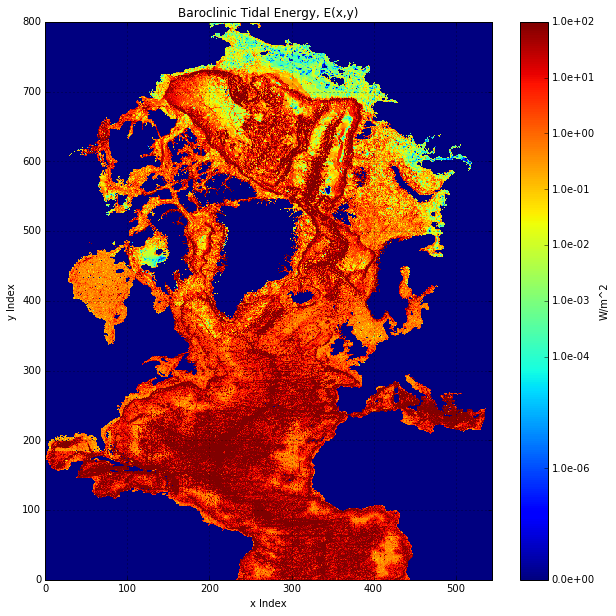

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')
#clines = ax.contour(E,0.0,colors='white')
mesh = ax.pcolormesh(E,norm=colors.SymLogNorm(linthresh=0.00000001, 
                                              linscale=0.00000001,vmin=0.0, vmax=100),cmap=cmap)

cbar = fig.colorbar(mesh,ticks=[0.0,10e-7,10e-5,10e-4,10e-3,10e-2,10e-1,10e0,10e1,10e2],ax=ax,format='%.1e')
cbar.set_label('W/m^2')
plt.axis((0, E.shape[1], 0, E.shape[0]))

#clines = ax.contour(E,0.0,colors='white')
ax.grid()
ax.set_title('Baroclinic Tidal Energy, E(x,y)')
ax.set_xlabel('x Index')
ax.set_ylabel('y Index')